# Data analysis of police reports

Based on the dataset of police reports from 2016, this model aims to predict the time and days with highets chance of police reports.

Scikit-learn will be used to create the prediction models; `pandas` and `numpy` will be used for data manipulation and `matplotlib` for visualization.

In [1]:
# Dependencias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn import (
    svm, linear_model, neighbors, discriminant_analysis,
    neural_network, naive_bayes, tree
)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
def split_objective(input_df, dims):
    features = input_df.loc[:, input_df.columns != list(dims.keys())[-1]]
    objective = input_df[input_df.columns[-1:]]
    return (features, objective)

We load the victims' dataset into a `DataFrame` and process the date.

In [4]:
vic_df = pd.read_excel('pnc_victimas.xlsx')
vic_df['fecha'] = pd.to_datetime(
    dict(year=vic_df['año_ocu'], month=vic_df['mes_ocu'],day=vic_df['día_ocu']), 
    format='%Y-%m-%d')

vic_df = vic_df[vic_df.hora_ocu != 99]
vic_df.head()

,núm_corre_f,núm_corre,año_ocu,mes_ocu,día_ocu,día_sem_ocu,hora_ocu,g_hora,g_hora_mañ.tar.noch,área_geo_ocu,...,zona_ocu,sexo_per,edad_per,g_edad_60ymás,g_edad_80ymás,edad_quinquenales,menor_mayor,delito_com,g_delitos,fecha
0,1,1,2016,1,1,5,0,1,1,1,...,12,1,56,10,10,12,1,69,3,2016-01-01
1,2,2,2016,1,1,5,8,2,1,2,...,99,1,42,7,7,9,1,69,3,2016-01-01
2,3,3,2016,1,1,5,8,2,1,2,...,99,1,38,6,6,8,1,69,3,2016-01-01
3,4,4,2016,1,2,6,15,3,2,2,...,99,1,69,11,12,14,1,69,3,2016-01-02
4,5,5,2016,1,2,6,19,4,3,1,...,6,1,27,4,4,6,1,69,3,2016-01-02


We aim to create a new `DataFrame` with the ammount of police reports by month, day, hour of the day and municipality.

In [5]:
grupos = vic_df.groupby(by=('año_ocu', 'mes_ocu', 'día_ocu', 'hora_ocu', 'mupio_ocu'))
convertido = pd.DataFrame({'total': grupos.size()}).reset_index()
convertido.columns = ['ano', 'mes', 'dia', 'hora', 'muni', 'total']
convertido.sort_values(['ano', 'mes', 'dia', 'hora'])

print(convertido.head())
print(convertido.shape)

# Export the new dataframe
convertido.to_csv('convertido.csv', index=False)

    ano  mes  dia  hora  muni  total
0  2016    1    1     0   101      1
1  2016    1    1     0   108      2
2  2016    1    1     0   110      2
3  2016    1    1     0   501      1
4  2016    1    1     0  1201      1
(30914, 6)


## Linear model by time of the day

This model aims to find the hours with highest amount of reports.

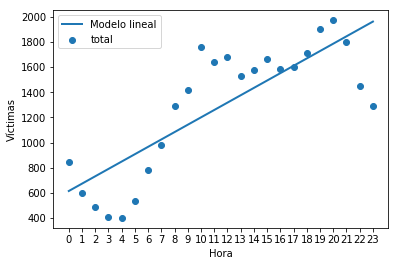

In [6]:
grupos_hora = convertido.groupby(by='hora')
convertido_hora = pd.DataFrame({'total': grupos_hora.size()}).reset_index()
convertido_hora.to_csv('horas.csv', index=False)

lr = linear_model.LinearRegression()
lr.fit(convertido_hora[['hora']], convertido_hora[['total']])
convertido_hora['predict'] = lr.predict(convertido_hora[['hora']])

plt.scatter(convertido_hora.hora, convertido_hora.total)
plt.plot(convertido_hora.hora, convertido_hora.predict, lw=2, label='Modelo lineal')
plt.xlabel('Hora')
plt.ylabel('Víctimas')
plt.xticks(np.arange(len(convertido_hora[['hora']])))
plt.legend()
plt.show()

## Busiest date and times

Now, let's find out what days and times have the highest amount of police reports.

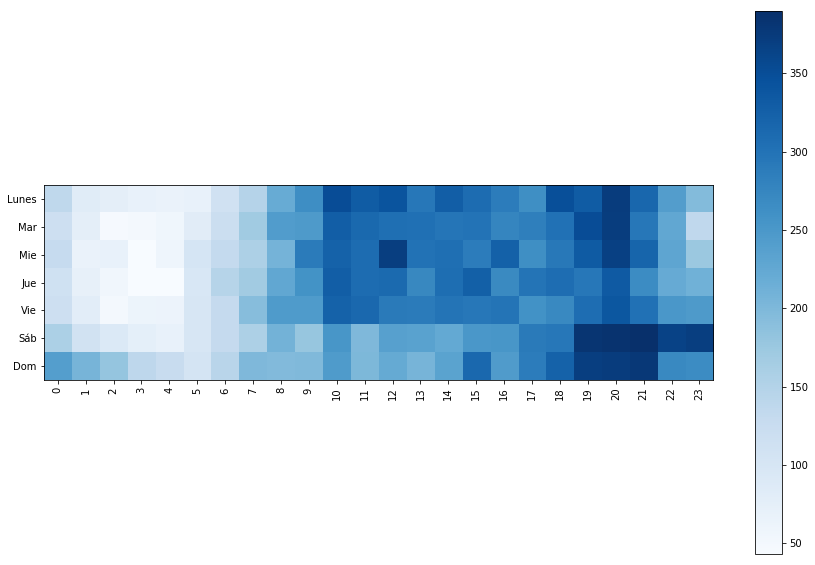

In [10]:
df_limpio = vic_df.groupby(['día_sem_ocu', 'hora_ocu']).size().unstack('hora_ocu', fill_value=0)

# print(df_limpio.head())

fig, ax = plt.subplots(figsize=(15,10))

im = ax.imshow(df_limpio, cmap='Blues')
fig.colorbar(im, ax=ax)
xticks = list(range(0, 24))
yticks = ['Lunes', 'Mar', 'Mie', 'Jue', 'Vie', 'Sáb', 'Dom']
ax.set_xticks(range(len(xticks)))
ax.set_yticks(range(len(yticks)))

ax.set_xticklabels(xticks, rotation=90)
ax.set_yticklabels(yticks, rotation=0)

#plt.pcolor(df_limpio)
plt.show()